# **GCAM Scenario Adjustment Tutorial**
### Matthew Binsted, Ellie Lochner, Pralit Patel

This tutorial was developed as part of the 2024 GCAM Annual Meeting to show GCAM users how to conduct scenario adjustments and user modifications in GCAM. This tutorial has two main parts: 

**Part 1** discusses what scenarios are and how to design scenarios. 

**Part 2** covers setting up scenarios using different methods (pre-existing XMLs, using `gcamdata`, using R scripts outside `gcamdata`, using `gcamdata` "user modification chunks, and using `gcamwrapper`).   

# Part 1

## What is a scenario?

The Intergovernmental Panel on Climate Change (IPCC) defines a **scenario** as "**a plausible description of how the future may develop** based on a **coherent and internally consistent set of assumptions** about key driving forces (e.g., rate of technological change (TC), prices, etc.) and relationships." The IPCC also notes that "scenarios are neither predictions nor forecasts, but are used to provide a view of the implications of developments and actions."

A scenario storyline is "A narrative description of a scenario (or family of scenarios), highlighting the main **scenario characteristics**, relationships between **key driving forces** and the dynamics of their **evolution**."
[*From IPCC, 2021: Annex VII: Glossary.*](https://www.ipcc.ch/report/ar6/wg1/downloads/report/IPCC_AR6_WGI_AnnexVII.pdf)

***Scenario Narrative Example:  SSP3***

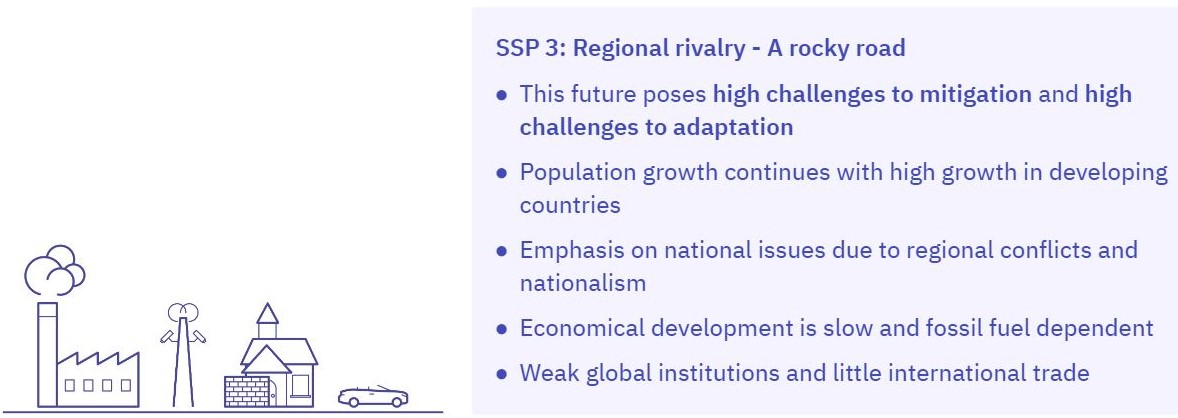

[*Source: Primer on Climate Change Scenarios*](https://climatescenarios.org/primer/socioeconomic-development) 

## Reference Scenarios

A **reference scenario** is "used as a starting or reference point for a comparison between two or more scenarios".  [*IPCC, 2021*](https://www.ipcc.ch/report/ar6/wg1/downloads/report/IPCC_AR6_WGI_AnnexVII.pdf)

#### GCAM's Reference Scenario
GCAM's Reference scenario has some specific characteristics:

- Does not include any explicit representation of policy.
    - However, the impact of existing policies may influence calibration parameters.
    - ***Note***: GCAM-USA is an exception. It includes limited representation of current policies, e.g., a representation of the Clean Air Act Section 111(b) New Source Performance Standards.
- Does not include climate impacts.
    - e.g., `configuration_ref.xml calls HDDCDD_constdd_no_GCM.xml`, which assumes flat Heating Degrtee Days (HDD) and Cooling Degree Days (CDD) beyond 2015.
    - ***Note***: Climate impacts is an active area of research at JGCRI.

## Designing Scenarios

Studies employing integrated, multi-sector models like GCAM begin with a counterfactual "reference" scenario. This reference scenario is compared against a range of alternative scenarios, including alternative social, technical, or policy futures.

The goal of comparing different scenarios raises several important questions:

- How many scenarios should be considered?
    - Fewer scenarios make it easy to explain and visualize to a large audience.
    - More scenarios facilitates exploration of a broad range of influences and outcomes.
- Single perturbation vs. multiple changes?
    - Introducing a single change helps to isolate the affect of that change on future results.
    - Introducing multiple changes simultaneously can create richer scenario narratives, reveal important interactions, and help quantify cumulative impacts of changes.
- Global vs. region-specific changes
    - Remember - *"coherent and internally coherent set of assumptions"*

Ultimately, the decisions about scenario design will be driven by the overarching research question.

***Scenario Design Example:  SSP Energy and Agriculture/Land Use Scenario Components***

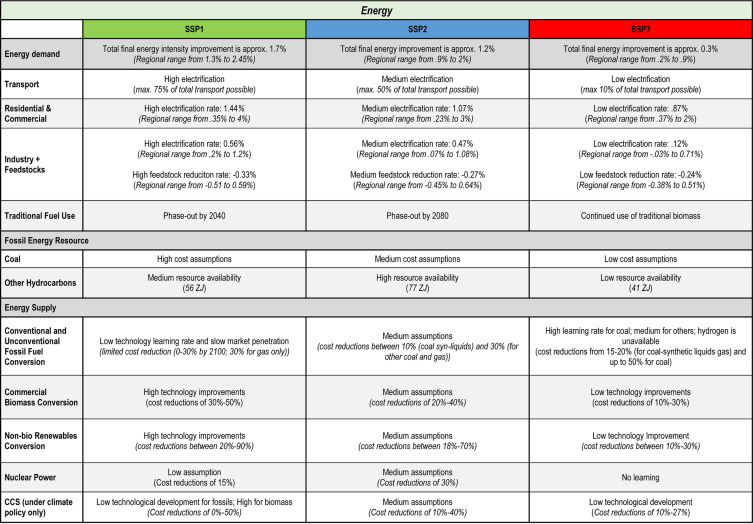
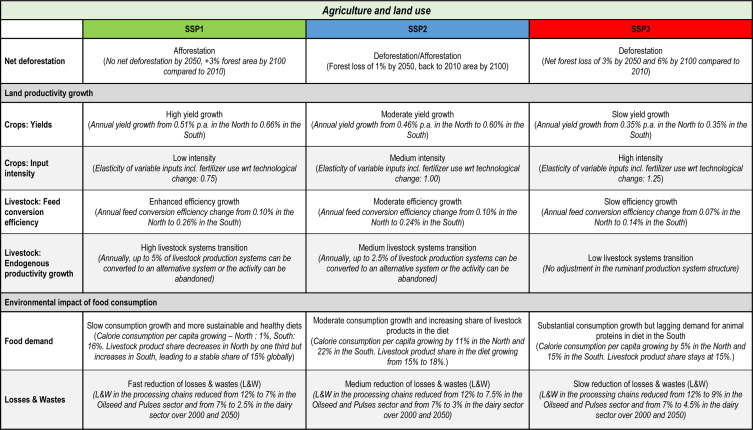

[*Source: Fricko et al. (2017)*](https://doi.org/10.1016/j.gloenvcha.2016.06.004) 

# Part 2

## Modifying XML Data & Setting Up Scenarios

There’s more than one way to peel a potato (and there are several ways to set up scenarios and modify XML data in GCAM):

- Hand-editing XMLs
- Utilizing pre-existing XMLs
- Adjusting parameters in `input/gcamdata/inst/extdata` or the `constants.R` file within the `gcamdata` package
- User modification functions
- R scripts outside `gcamdata`
- Adjusting the structure of a region or sector

The best best approach for modifying GCAM depends on:
- What type of change you are making
- Your intention for making the change
    - Ex. quick understanding vs. formal project or paper
- Whether or not your changes need to be maintained over the long term (i.e., between GCAM versions)

**Wait...what did I do again?** No matter the reasoning for modification, it is important to think carefully about tracking your changes. You can do this several ways:

- Using **version control** tolls like Git
- Separate your assumptions from default assumptions
- Creating well documented copies and backups

### Hand-editing XMLs 

This method is generally **NOT** advisable. However, there are pros and cons:
- **Pro**: Hand-editing files can be expedient and sensible for creating simple inputs such as policy files
- **Con**: Hand-editing files can make it more difficult to trace changes and easier to introduce errors
    - e.g., did you include all 32 regions?

The intent of the change also matters. 
- Is this a quick test?
- Is this meant to be maintained?

In any case, be kind to your future self (will you remember exactly what you changed?)


***Hand-Edited XML Example:  Specifying Carbon Price Pathway by Editing an Existing File (input/policy/carbon_tax_25_5.xml)***


```xml
<scenario>
    <world>
        <region name="USA">
            <ghgpolicy name="CO2_LTG">
                <market>global</market>
<fixedTax year="2025">321.863</fixedTax>
<fixedTax year="2030">373.127431376421</fixedTax>
<fixedTax year="2035">432.556957604837</fixedTax>
<fixedTax year="2040">501.452066609372</fixedTax>
<fixedTax year="2045">581.320380324401</fixedTax>
<fixedTax year="2050">673.909645772294</fixedTax>
<fixedTax year="2055">781.245980764517</fixedTax>
<fixedTax year="2060">905.678211151381</fixedTax>
<fixedTax year="2065">1049.9292698462</fixedTax>
<fixedTax year="2070">1217.15578238142</fixedTax>
<fixedTax year="2075">1411.01714289912</fixedTax>
<fixedTax year="2080">1635.75559215581</fixedTax>
<fixedTax year="2085">1896.28904987747</fixedTax>
<fixedTax year="2090">2198.31873290193</fixedTax>
<fixedTax year="2095">2548.45391410123</fixedTax>
<fixedTax year="2100">2954.35655216592</fixedTax>
            </ghgpolicy>
        </region>
	</world>
</scenario>
```

### Setting Up Scenarios - Pre-existing XMLs

GCAM comes with several XMLs containing non-standard scenario components.

`input/gcamdata/xml`:
- **Socioeconomics** (population and GDP): socioeconomics_SSP[1-5], socioeconomics_gSSP[1-5]
- **Elasticities**: [aluminum, cement, chemicals, iron_steel, Off_road, other_industry]\_incelas_[g]ssp[1-5]
- **Buildings energy demands**: building_SSP[1-5]
- **Technology Cost**: [geo, nuclear, wind, solar]_adv, [geo, nuclear, wind, solar]_low
- **Resources**: resources_SSP[1-5]
- **CCS/carbon storage**: ccs_supply_high, ccs_supply_low, ccs_supply_lowest, no_offshore_ccs, high_cost_ccs, turn_off_ccs.xml (new as of GCAM X.X)
- **DAC**: dac_ssp[1-5]
- **HDD/CDD**: variety of GCMs
- **Ag productivity**: ag_prodchange_ssp[1-5]\_IRR_MGMT

`input/policy`:

- Carbon price trajectories
- Radiative forcing targets
- SPAs (Shared Policy Assumptions)

In all cases, it is important to mind the internal consistency of your scenario.  For running the SSPs, we include the full set of consistent SSP scenario components in `batch_SSP_REF.xml`, which is then referenced in `configuration_ssp.xml`.  We can see in the batch file a "base" set of inputs and the complete set of alternative files used to produce the SSP, such as:


***Pre-existing XMLs Example:  SSP3***


```xml
<ComponentSet name="SSP Harmonized">
		<FileSet name="SSP3">
			<!-- SOCIOECONOMICS -->
			<Value name="socioeconomics">../input/gcamdata/xml/socioeconomics_SSP3.xml</Value>
			
			<!-- INDUSTRY -->
			<Value name="ind">../input/gcamdata/xml/other_industry_incelas_ssp3.xml</Value>		
			<Value name = "iron_steel_income_elas">../input/gcamdata/xml/iron_steel_incelas_ssp3.xml</Value>   
			<Value name = "Off_road_income_elas">../input/gcamdata/xml/Off_road_incelas_ssp3.xml</Value>  
			<Value name = "chemical_income_elas">../input/gcamdata/xml/chemical_incelas_ssp3.xml</Value>   
			<Value name = "aluminum_income_elas">../input/gcamdata/xml/aluminum_incelas_ssp3.xml</Value> 
			<Value name = "paper_income_elas">../input/gcamdata/xml/paper_incelas_ssp3.xml</Value> 
			<Value name="cement">../input/gcamdata/xml/cement_incelas_ssp3.xml</Value>
			
			<!-- TRANSPORTATION -->
			<Value name="trn">../input/gcamdata/xml/transportation_UCD_SSP3.xml</Value>
			
			<!-- BUILDINGS -->
			<Value name="bld">../input/gcamdata/xml/building_SSP3.xml</Value>
			
			<!-- AGLU -->
			<Value name="aglu">../input/gcamdata/xml/ag_prodchange_ssp3_IRR_MGMT.xml</Value>
			<Value name="aglu">../input/gcamdata/xml/pasture_ssp34.xml</Value>
			
			<!-- WIND -->
			<Value name="wind">../input/gcamdata/xml/wind_low.xml</Value>
			
			<!-- SOLAR -->
			<Value name="solar">../input/gcamdata/xml/solar_low.xml</Value>
			
			<!-- GEOTHERMAL -->
			<Value name="geothermal">../input/gcamdata/xml/geo_low.xml</Value>
			
			<!-- NUCLEAR -->
			<Value name="nuclear">../input/gcamdata/xml/nuclear_low.xml</Value>
			
			<!-- BIO TRANSFORMATION -->
			<Value name="bio">../input/gcamdata/xml/en_transformation_low.xml</Value>
			<Value name="bio">../input/gcamdata/xml/elec_bio_low.xml</Value>
			
			<!-- FOSSIL -->
			<Value name="resource_extraction">../input/gcamdata/xml/resources_SSP3.xml</Value>
			
			<!-- TRADE -->
			<Value name="bio_trade">../input/gcamdata/xml/ssp3_bio_trade.xml</Value>
			
			<!-- CCS -->
			<Value name="ccs">../input/gcamdata/xml/ccs_supply_low.xml</Value>
			<Value name="ccs">../input/gcamdata/xml/no_offshore_ccs.xml</Value>
						
			<!-- NON-CO2 -->
			<Value name="nonco2">../input/gcamdata/xml/delete_gdp_control.xml</Value>
			<Value name="nonco2">../input/gcamdata/xml/ssp34_emissions_factors.xml</Value>

			<!-- WASTEWATER TREATMENT FRACTIONS -->
			<Value name="wwtrt">../input/gcamdata/xml/EFW_WWtrt_coefs_SSP3.xml</Value>

            <Value name = "prune_ag">../input/gcamdata/xml/prune_empty_ag.xml</Value>
		</FileSet>		
	</ComponentSet>
```

### Setting Up Scenarios - `gcamdata`

There are many changes that can be implemented through `gcamdata`:
- `gcamdata` is fast and automated: updates to any input files flow through to all impacted XMLs.
- Some changes are easier to implement than others:
    - Changes to existing technologies/parameters are easier (the data processing structure already exists).
    - Adding new technologies or sectors is more involved, but `gcamdata` contains a lot of functionality that makes life easier.
- It is not always easy to predict which XMLs will be affected.
- `driver_drake`, which detects changes to specific input files or R chunks and dynamically determines what portions of the data processing need to be run, is your friend (and a major time saver).
- If the changes you are making are something you want to maintain over a long period of time or if you plan to bring the changes back to the Core GCAM, then implementing your changes through `gcamdata` is the best approach.

**NOTE**: When re-running `driver_drake`, existing XMLs will be overwritten for those that are updated by the new changes.
- When running `driver`, all XMLs and output filed are deleted before being regenerated.

#### Notes on share weights
Share weights serve two purposes in GCAM:
- Share weights are used to calibrate the model to observed historical data.
    - GCAM's calibration procedure captures regionally-specific preferences for particular choice alternatives (arising, for example, from societal preferences, existing infrastructure, barriers to market entry, etc.) into the share weight parameters.
    - The technology with the largest market share is assigned a share weight of 1 during calibration; other technology share weights are indexed around this value.
    - Calibrated share weights capture important information about non-cost technology characteristics that impact historical technology deployment.
    - Be careful about changing calibrated subsector or technology share weights for technologies that exist historically.
- Share weights are also used in GCAM to provide for new technologies to be phased in gradually.
    - Technologies with zero share weight in a model period will receive zero market share and therefore will not deploy 
    - Modelers can introduce new technologies to the choice set in a GCAM sector by setting share weights for new technologies to low values in the first year they are available and gradually increasing them to a neutral value in later years.    
    - Assigning a technology a share weight of 1 means that it competes on a purely-economic basis with the incumbent technology (non-cost factors do not influence technology competition)


***`gcamdata` Example:  Increasing share weights for battery electric vehicle (BEV) and fuel cell electric vehicle (FCEV) freight trucks to 1 by 2035***
- Introduce desired changes in input files (`A54.globaltranTech_shrwt_revised.csv` and `A54.globaltranTech_interp_revised.csv`, in `\input\gcamdata\inst\extdata\energy`)
- load gcamdata and run `driver_drake()`
    - NOTE: you can also use `driver_drake(stop_after = "chunk_name")`, but it is not always easy to predict which chunks/XMLs will be affected by changes to a specific input file

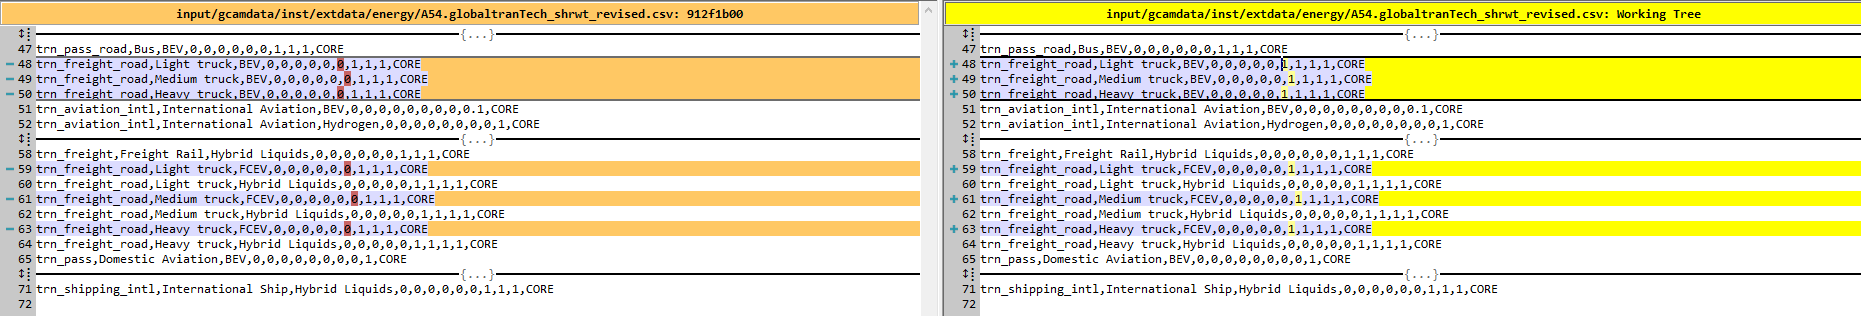

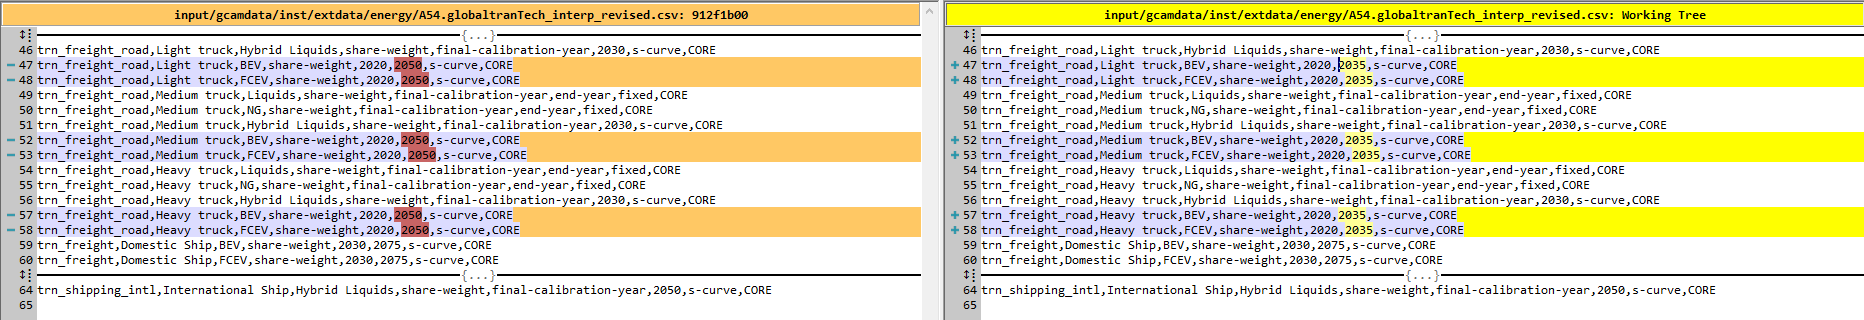

```R
> devtools::load_all(".")
ℹ Loading gcamdata
> driver_drake()
```

```bash
Loading required namespace: drake
GCAM Data System v5.1
Found 430 chunks
Found 4383 chunk data requirements
Found 2458 chunk data products
1487 chunk data input(s) not accounted for
ℹ Consider drake::r_make() to improve robustness.
▶ target energy.A54.globaltranTech_interp_revised
▶ target energy.A54.globaltranTech_shrwt_revised                                                                                                            
▶ target module_energy_L254.transportation_UCD                                                                                                              
▶ target L254.StubTranTechLoadFactor
▶ target L254.GlobalTranTechSCurve
▶ target L254.StubTranTechCoef
▶ target L254.FinalEnergyKeyword_trn
▶ target L254.StubTech_passthru
▶ target L254.PriceElasticity_trn
▶ target L254.tranSubsectorSpeed_passthru
▶ target L254.BaseService_trn
▶ target L254.StubTechCalInput_passthru
▶ target L254.GlobalTranTechInterp
▶ target L254.tranSubsectorShrwtFllt
▶ target L254.GlobalTechShrwt_nonmotor
▶ target L254.tranSubsectorSpeed
▶ target L254.tranSubsectorSpeed_noVOTT
▶ target L254.tranSubsectorFuelPref
▶ target L254.GlobalTechShrwt_passthru
▶ target L254.StubTranTech
▶ target L254.IncomeElasticity_trn
▶ target L254.PerCapitaBased_trn
▶ target L254.tranSubsectorInterp
▶ target L254.tranSubsectorLogit
▶ target L254.StubTranTechCalInput
▶ target L254.Supplysector_trn
▶ target L254.StubTech_nonmotor
▶ target L254.StubTranTechCost
▶ target L254.tranSubsectorVOTT
▶ target L254.StubTechProd_nonmotor
▶ target L254.GlobalRenewTech_nonmotor
▶ target L254.tranSubsectorSpeed_nonmotor
▶ target L254.GlobalTechCoef_passthru
▶ target L254.StubTechTrackCapital
▶ target L254.GlobalTranTechShrwt
▶ target L254.GlobalTranTechProfitShutdown
▶ target L254.tranSubsectorShrwt
▶ target L254.tranSubsectorInterpTo
▶ target module_energy_transportation_UCD_CORE_xml
▶ target transportation_UCD_SSP3.xml
▶ target transportation_UCD_CORE.xml
▶ target transportation_UCD_SSP1.xml
▶ target transportation_UCD_SSP5.xml
▶ target xml.transportation_UCD_CORE.xml
All done.
> 
```

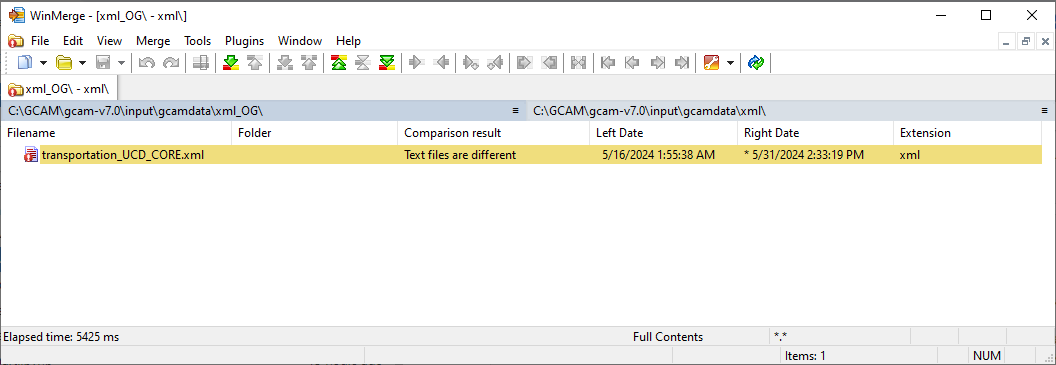

### Setting Up Scenarios - Leveraging `gcamdata` functions outside `gcamdata`

There are many `gcamdata` functions available to users withouth having to run `driver`, by simply loading the `gcamdata` package by running `devtools::load_all()` within the `input/gcamdata` directory.  These functions include:

- `left_join_error_no_match()`
- `repeat_add_columns()`
- `approx_fun()`
- `gdp_deflator()`
- **XML functions**: `create_xml()`, `add_xml_data()`, `run_xml_conversion()`

This provides the ability to quickly transform data in an R script and generate XML files, without some of the overhead associated with `gcamdata` chunks.

However, some input data flows through multiple `gcamdata` chunks to multiple XML outputs, and operating outside of `gcamdata` may miss some of these data interdependencies. (Users can use `dstrace()`, RStudio Find in Files (`ctrl+shift+F`), etc. to understand how data flows through `gcamdata` and avoid missing important interdependencies.)

In [1]:
# Set some path locations which will be helpful later
HOME = Sys.getenv("HOME")
WORK_HOME = paste0(HOME, "/notebooks/")
GCAMDATA_HOME = paste0(HOME, "/data/gcamdata/")
GCAM_EXE_HOME = paste0(WORK_HOME, "exe/")

In [ ]:
# Example - Updating USA population and GDP to match AEO 2023

# Set working directory to gcamdata folder within GCAM repo
setwd(GCAMDATA_HOME)

# Load libraries
library(tibble)
library(dplyr)
library(tidyr)
library(readr)
devtools::load_all()

#  ---------------------------------------------------------------
# Load raw data

# Default GCAM population & GEP data from gcamdata
# NOTE: this data is not needed to implement AEO population & GDP,
# but is left here as an example for how intermeidate tables can be loaded from gcamdata
# L101.Pop_thous_Scen_R_Yfut <- load_from_cache("L101.Pop_thous_Scen_R_Yfut") 
# L101.Pop_thous_Scen_R_Yfut <- L101.Pop_thous_Scen_R_Yfut[[1]]

# L102.gdp_mil90usd_Scen_R_Y <- load_from_cache("L102.gdp_mil90usd_Scen_R_Y") 
# L102.gdp_mil90usd_Scen_R_Y <- L102.gdp_mil90usd_Scen_R_Y[[1]]

# Set working directory back to the location of this script to find
# input data that's not from gcamdata
setwd(WORK_HOME)

# AEO 2023 socioeconomics data
AEO.2023.Ref_socio <- read_csv("misc/AEO.2023.Ref_socio.csv", comment = "#", show_col_types = FALSE) %>%
  # gather data to "long" format
  gather(year, value, -c(variable, full.name, api.key, units)) %>%
  filter(full.name == "with Armed Forces Overseas" | variable == "Real Gross Domestic Product") %>%
  # clean data
  filter(!grepl("Growth", year)) %>%
  mutate(year = as.integer(year)) %>%
  mutate(value = as.numeric(value))


#  ---------------------------------------------------------------
# Process data

# 1. Population
# Future GDP from AEO 2023 Reference case (AEO data starts in 2022):
AEO.2023_pop <- AEO.2023.Ref_socio %>%
  filter(full.name == "with Armed Forces Overseas") %>% 
  filter(year %in% MODEL_FUTURE_YEARS) %>% 
  mutate(region = gcam.USA_REGION,
         totalPop = round(as.numeric(value) * CONV_MIL_THOUS, socioeconomics.POP_DIGITS)) %>% 
  select(region, year, totalPop)

# 2. GDP
# Future GDP from AEO 2023 Reference case (AEO data starts in 2022):
AEO.2023_GDP <- AEO.2023.Ref_socio %>%
  filter(variable == "Real Gross Domestic Product") %>%
  filter(year %in% MODEL_FUTURE_YEARS) %>% 
  # convert billion 2012USD to million 1990USD
  mutate(GDP = value * gdp_deflator(1990, 2012) * CONV_BIL_MIL) %>% 
  mutate(region = gcam.USA_REGION) %>% 
  select(region, year, GDP)

# Create XML folder
dir.create("xml")

#  ---------------------------------------------------------------
# Produce XMLs

create_xml("xml/socioeconomics_USA_AEO23_ref.xml") %>%
  add_xml_data(data = AEO.2023_pop, header = "Pop") %>%
  add_xml_data(data = AEO.2023_GDP, header = "GDP") %>%
  run_xml_conversion()



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


ℹ Loading gcamdata


### User Modification Functions

User modification functions help with modifying GCAM data:

- Allows users to write their own function to modify a `gcamdata` input/output, without modifying input CSVs of `gcamdata` chunks directly.
- Modified objects get "plugged into" datasystem and passed to all dependent chunks.
- New XMLs get created with user-specified suffixes, to distinguish them from core `gcamdata` XMLs.
    - **Note**: remember to update `configuration.xml` to include the custom XMLs before running GCAM.
- **Motivation**: Keep track of `gcamdata` changes from the user vs. Core GCAM assumptions, ensuring user-implemented changes can be automated and reproducible.
    

### Writing a User Modification Function

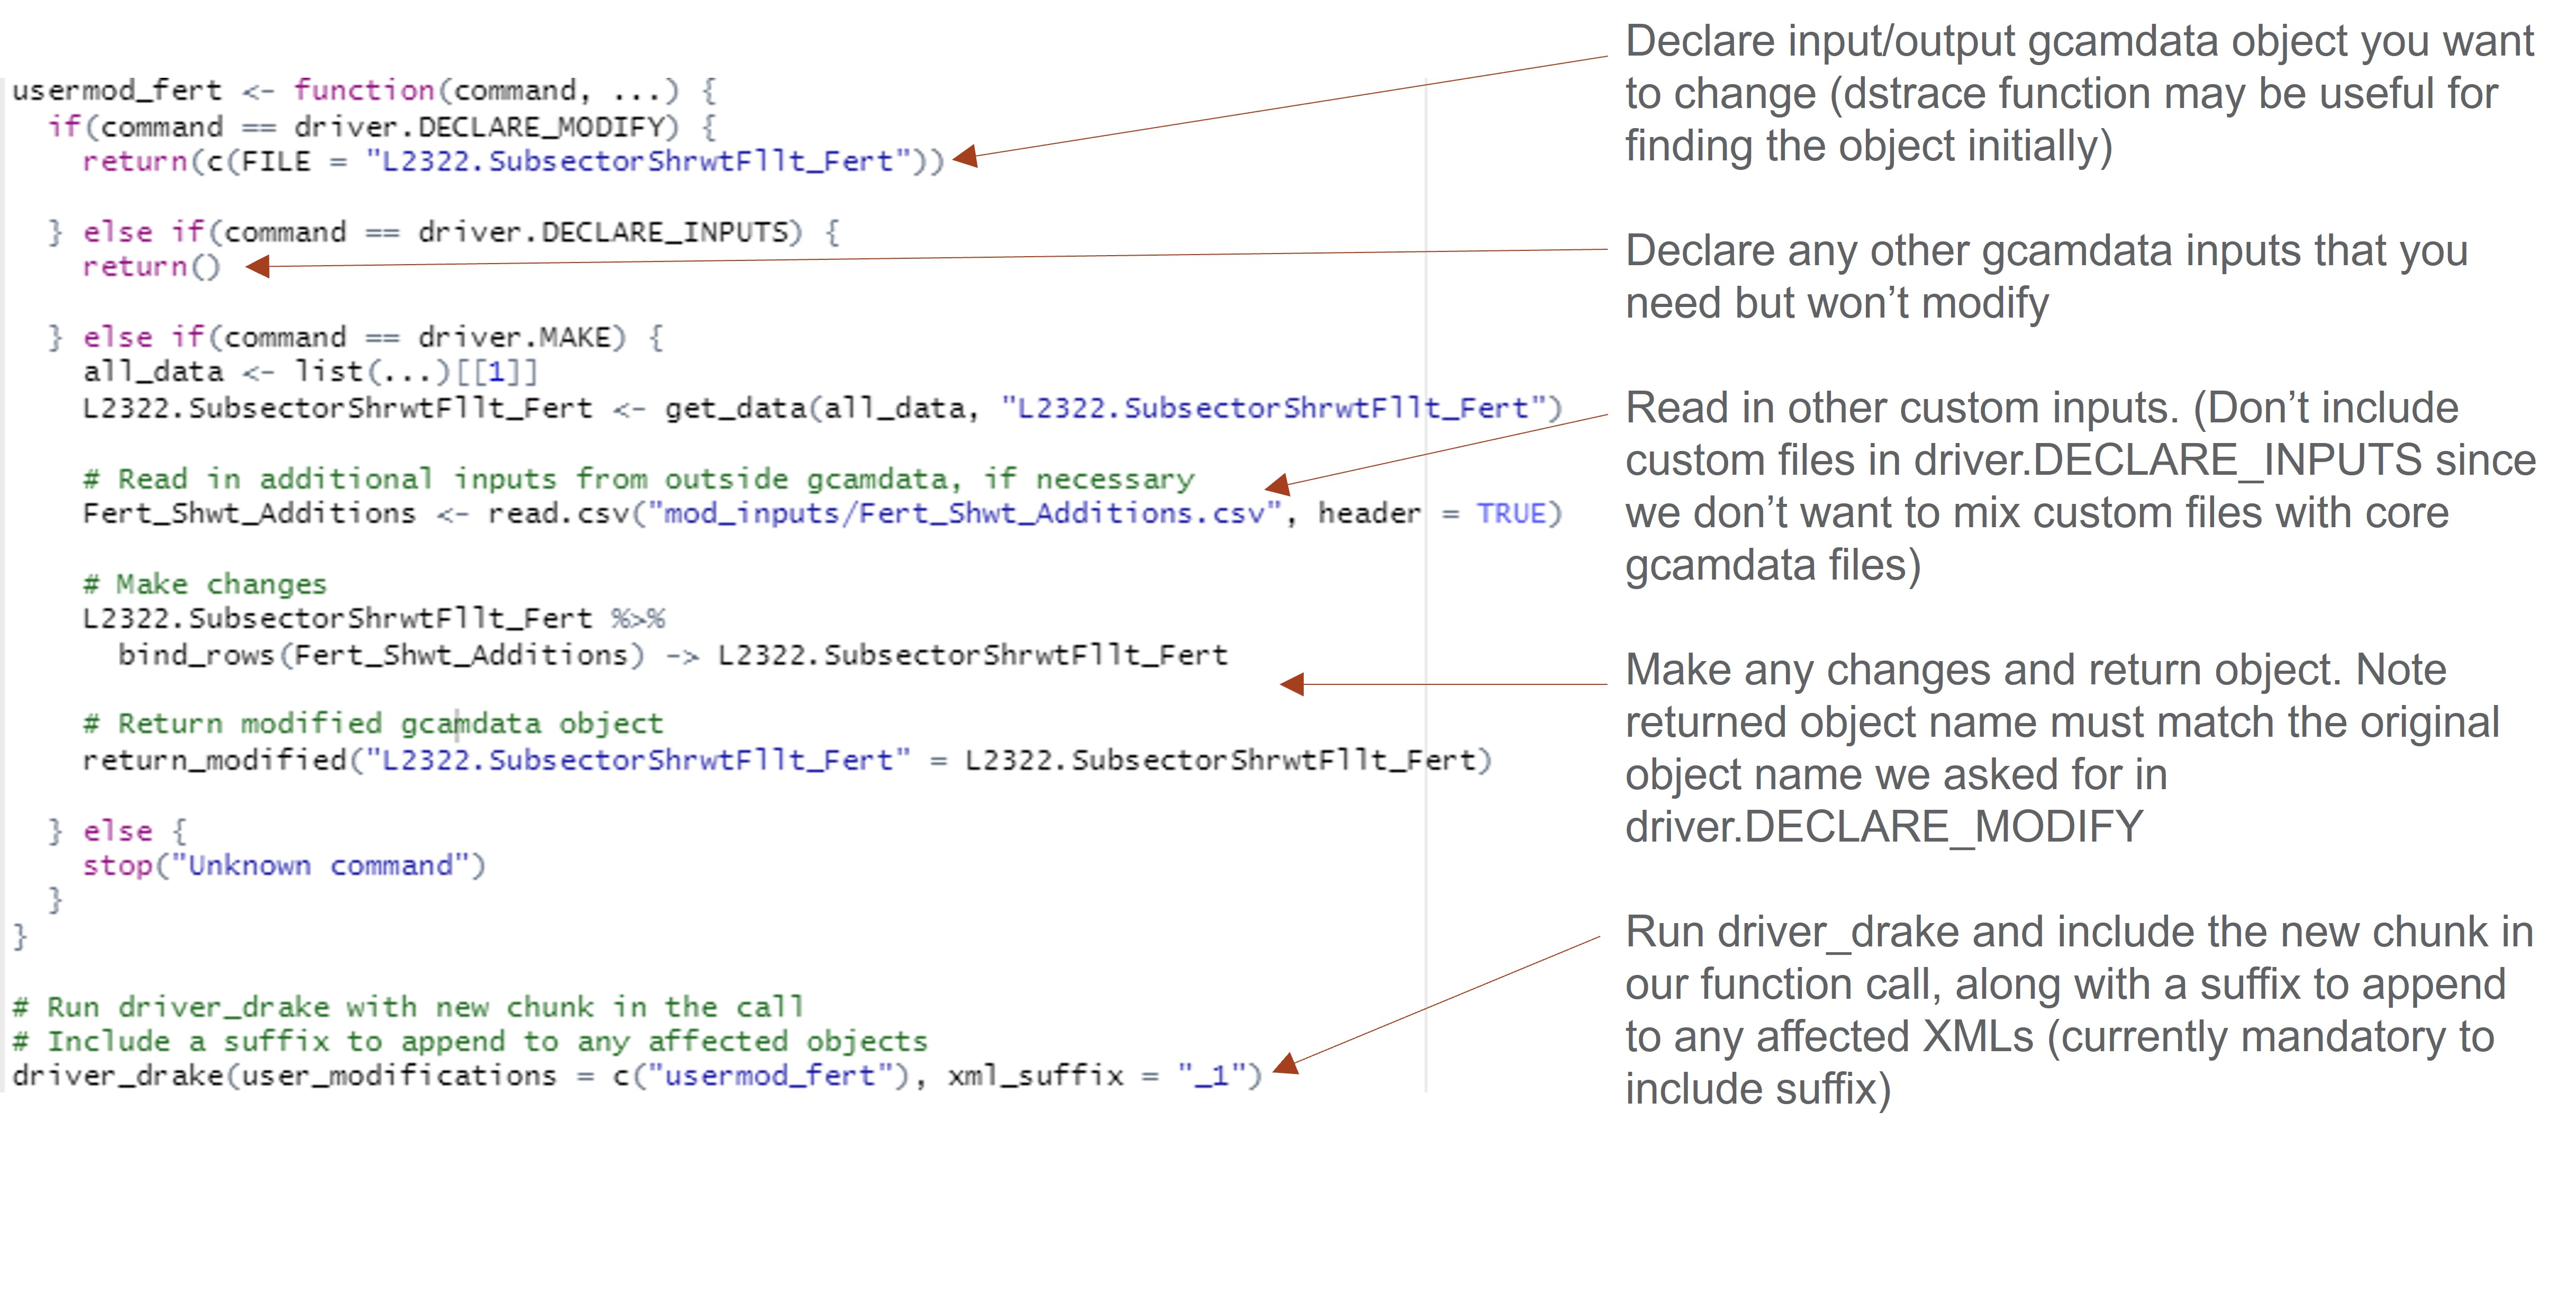

Here we present code that is available in the [**usermod_vignette**](https://github.com/JGCRI/gcam-core/blob/master/input/gcamdata/vignettes/usermod_vignette.Rmd) from [JGCRI GCAM Core github](https://github.com/JGCRI/gcam-core):

In this example we load in two csv files, `"energy/A322.subsector_shrwt.csv"` and `"common/GCAM_region_names.csv"`. We modify A322.subsector_shrwt, so we list it under `driver.DECLARE_MODIFY`, but do not modify GCAM_region_names, so it is listed under `driver.DECLARE_INPUTS`. Then, we set the shareweight column of the first row of A322.subsector_shrwt to `NEW.SHWT`. Finally, we use a new `return_modified()` function to return the modified A322.subsector_shrwt (note that we have to include the path for input files).

In [3]:
usermod_fert <- function(command, ...) {
  if(command == driver.DECLARE_MODIFY) {
    return(c(FILE = "energy/A322.subsector_shrwt"))
  } else if(command == driver.DECLARE_INPUTS) {
    # In addition to the objects users want to modify we can also ask for any other
    # inputs we need to do our operations but won't be modified
    return(c(FILE = "common/GCAM_region_names"))
  } else if(command == driver.MAKE) {
    all_data <- list(...)[[1]]
    GCAM_region_names <- get_data(all_data, "common/GCAM_region_names")
    A322.subsector_shrwt <- get_data(all_data, "energy/A322.subsector_shrwt")

    # Users could also read in additional files that exist outside of the data system
    # They should do that manually instead of through the driver.DECLARE_INPUTS so as to
    # avoid mixing user's custom files with Core files
    # A23.globaltech_eff.mine <- read_csv("/path/to/my/custom/A23.globaltech_eff_with_random_changes.csv")
    
    # Make some changes...
    A322.subsector_shrwt <- A322.subsector_shrwt %>%
      mutate(share.weight = as.double(share.weight),
             year = as.integer(year))
    A322.subsector_shrwt[1,"share.weight"] <- NEW.SHWT
    
    # NOTE: we have to match the original object name we asked for in driver.DECLARE_MODIFY, 
    # which means including the file path for input files
    # i.e. "energy/A322.subsector_shrwt" not "A322.subsector_shrwt"  
    # Other objects can be listed out just like for `return_data`
    return_modified("energy/A322.subsector_shrwt" = A322.subsector_shrwt)

  } else {
    stop("Unknown command")
  }
}
    

Before we run our user modification chunk, we should do an initial run of gcamdata to ensure everything is up to date prior to making changes.

In [4]:
# prepare to run gcamdata

# note: this is typically not necessary but needed here due to the read-only gcamdata
# set up an "overlay" read/write cache where reads will draw from the read-only saved
# cache and writes will live in temporary memory
source("misc/storr_gcamdata_readonly.R")
ro_driver = storr::driver_rds(paste0(GCAMDATA_HOME, "/.drake/"))
write_driver <- storr::driver_environment(hash_algorithm = ro_driver$hash_algorithm)
rw_cache = storr_gcamdata_readonly(ro_driver, write_driver)

# do an initial run to ensure our cache and all XMLs are up to date
setwd(GCAMDATA_HOME)
driver_drake(cache = rw_cache)


GCAM Data System v5.1

Found 276 chunks

Found 2712 chunk data requirements

Found 1715 chunk data products

985 chunk data input(s) not accounted for

✔ All targets are already up to date.



All done.


To include our modification, we include this new chunk in our next call to `driver_drake()` and also include a suffix to append to any affected XMLs (currently mandatory to include suffix).

In [5]:
NEW.SHWT <- 0.5

# only needed to avoid writing into read only data
options("gcamdata.xml.XML_PREFIX" = WORK_HOME)

# run driver with our user modification
driver_drake(user_modifications = c("usermod_fert"),
        xml_suffix = "__1", # output xml will be saved as ORIGINALNAME__1.xml
        cache = rw_cache, history = FALSE) # setting cache due to ready only, typically not needed


GCAM Data System v5.1

Found 276 chunks

Found 2712 chunk data requirements

Found 1715 chunk data products

986 chunk data input(s) not accounted for

▶ target usermod_fert

▶ target energy.A322.subsector_shrwt__0

▶ target module_energy_L2322.Fert

▶ target L2322.GlobalTechCapture_Fert

▶ target L2322.GlobalTechCost_Fert

▶ target L2322.Supplysector_Fert

▶ target L2322.GlobalTechProfitShutdown_Fert

▶ target L2322.SubsectorLogit_Fert

▶ target L2322.StubTechProd_FertDomCons

▶ target L2322.TechCoef_TradedFert

▶ target L2322.SubsectorInterp_Fert

▶ target L2322.StubTechProd_NtoAg

▶ target L2322.StubTech_Fert

▶ target L2322.GlobalTechSCurve_Fert

▶ target L2322.FinalEnergyKeyword_Fert

▶ target L2322.StubTechProd_FertImport

▶ target L2322.GlobalTechCoef_Fert

▶ target L2322.Production_FertExport

▶ target L2322.StubTechMarket_FertImports

▶ target L2322.SubsectorShrwtFllt_Fert

▶ target L2322.GlobalTechShrwt_Fert

▶ target L2322.TechShrwt_TradedFert

▶ target L2322.StubTechCoef_Fe

All done.


### Writing a User Modification Function: Creating Multiple XMLs

We can also generate multiple modified XMLs with this feature.

- **Note**: we must include an argument to the user mod function that we can update in a loop. For this example, instead of reading in the file directly, we modify `usermod_fert()` to read in a CSV with the name of the value of "file_name":

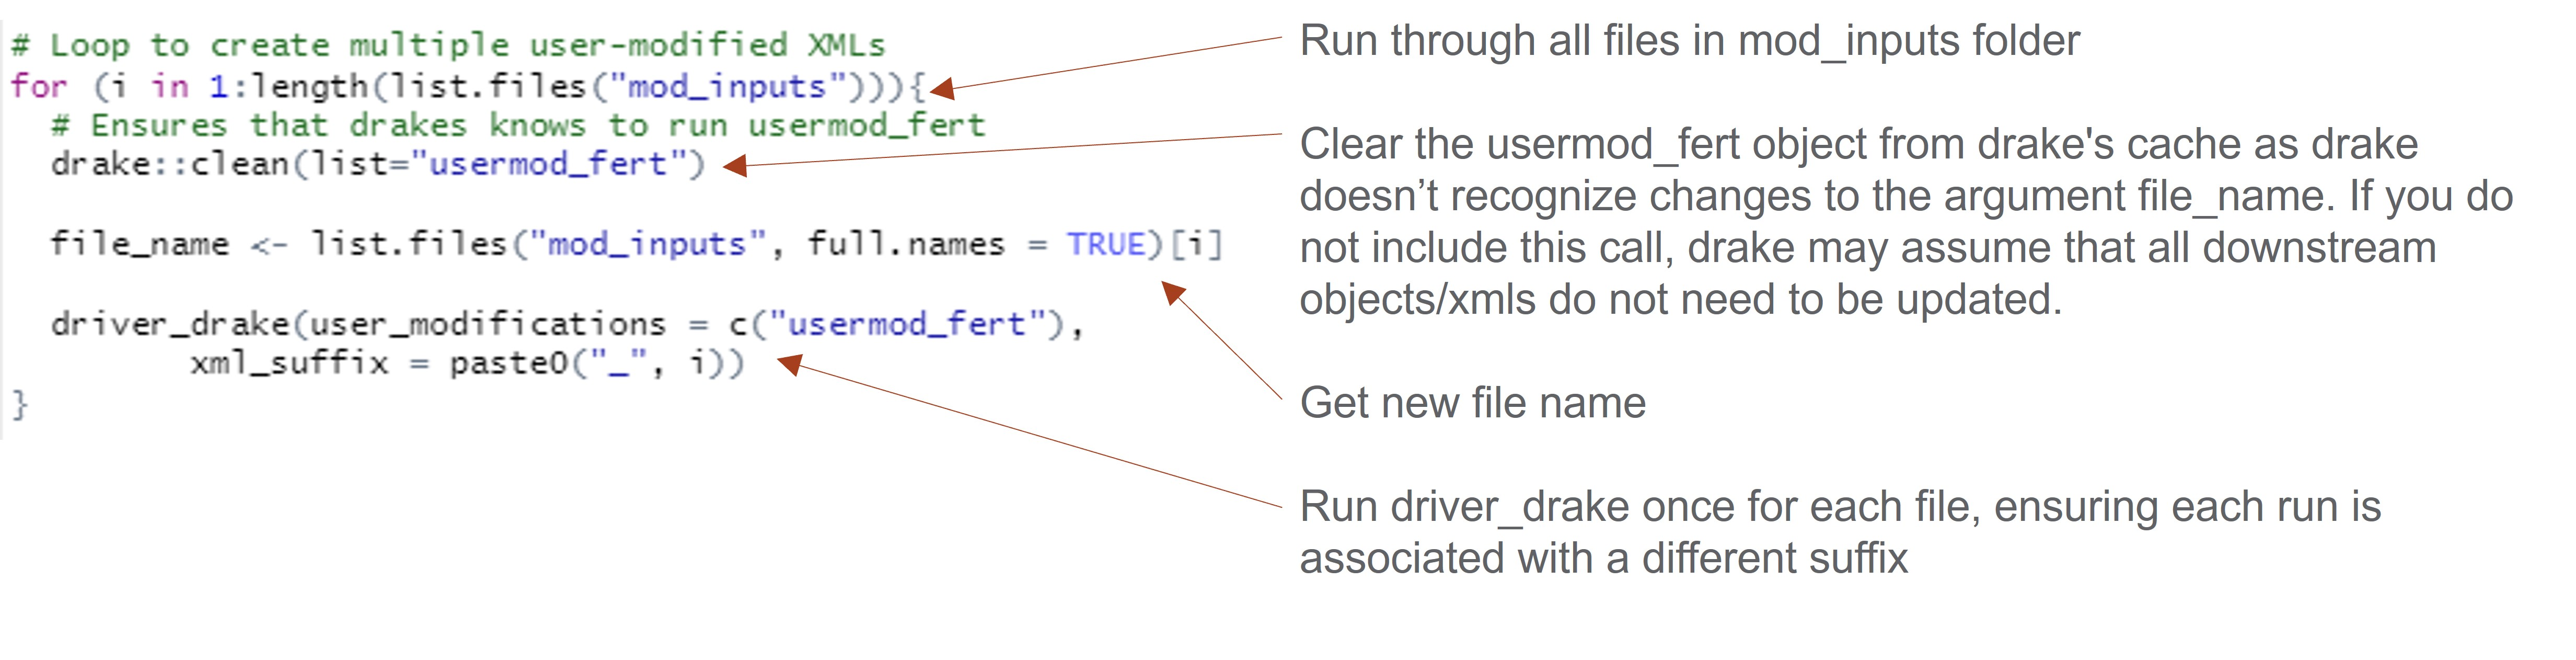

For simplicity in the live example we just loop over a vector of values instead of including separate input files, however the rest of the procedure is the same.

In [6]:
# Multiple shareweights to use
shareweights <- seq(0.2, 0.5, 0.1)

for (i in 1:length(shareweights)){
  drake::clean(list="usermod_fert", # Ensures that drakes knows to run usermod_fert
               cache = rw_cache)    # setting cache due to ready only, typically not needed
  
  NEW.SHWT <- shareweights[i]
  
  driver_drake(user_modifications = c("usermod_fert"),
               xml_suffix = paste0("__", i),
               cache = rw_cache, history = FALSE) # setting cache due to ready only, typically not needed
}


GCAM Data System v5.1

Found 276 chunks

Found 2712 chunk data requirements

Found 1715 chunk data products

986 chunk data input(s) not accounted for

▶ target usermod_fert

▶ target energy.A322.subsector_shrwt__0

▶ target module_energy_L2322.Fert

▶ target L2322.GlobalTechCapture_Fert

▶ target L2322.GlobalTechCost_Fert

▶ target L2322.Supplysector_Fert

▶ target L2322.GlobalTechProfitShutdown_Fert

▶ target L2322.SubsectorLogit_Fert

▶ target L2322.StubTechProd_FertDomCons

▶ target L2322.TechCoef_TradedFert

▶ target L2322.SubsectorInterp_Fert

▶ target L2322.StubTechProd_NtoAg

▶ target L2322.StubTech_Fert

▶ target L2322.GlobalTechSCurve_Fert

▶ target L2322.FinalEnergyKeyword_Fert

▶ target L2322.StubTechProd_FertImport

▶ target L2322.GlobalTechCoef_Fert

▶ target L2322.Production_FertExport

▶ target L2322.StubTechMarket_FertImports

▶ target L2322.SubsectorShrwtFllt_Fert

▶ target L2322.GlobalTechShrwt_Fert

▶ target L2322.TechShrwt_TradedFert

▶ target L2322.StubTechCoef_Fe

All done.


GCAM Data System v5.1

Found 276 chunks

Found 2712 chunk data requirements

Found 1715 chunk data products

986 chunk data input(s) not accounted for

▶ target usermod_fert

▶ target energy.A322.subsector_shrwt__0

▶ target module_energy_L2322.Fert

▶ target L2322.GlobalTechCapture_Fert

▶ target L2322.GlobalTechCost_Fert

▶ target L2322.Supplysector_Fert

▶ target L2322.GlobalTechProfitShutdown_Fert

▶ target L2322.SubsectorLogit_Fert

▶ target L2322.StubTechProd_FertDomCons

▶ target L2322.TechCoef_TradedFert

▶ target L2322.SubsectorInterp_Fert

▶ target L2322.StubTechProd_NtoAg

▶ target L2322.StubTech_Fert

▶ target L2322.GlobalTechSCurve_Fert

▶ target L2322.FinalEnergyKeyword_Fert

▶ target L2322.StubTechProd_FertImport

▶ target L2322.GlobalTechCoef_Fert

▶ target L2322.Production_FertExport

▶ target L2322.StubTechMarket_FertImports

▶ target L2322.SubsectorShrwtFllt_Fert

▶ target L2322.GlobalTechShrwt_Fert

▶ target L2322.TechShrwt_TradedFert

▶ target L2322.StubTechCoef_Fe

All done.


GCAM Data System v5.1

Found 276 chunks

Found 2712 chunk data requirements

Found 1715 chunk data products

986 chunk data input(s) not accounted for

▶ target usermod_fert

▶ target energy.A322.subsector_shrwt__0

▶ target module_energy_L2322.Fert

▶ target L2322.GlobalTechCapture_Fert

▶ target L2322.GlobalTechCost_Fert

▶ target L2322.Supplysector_Fert

▶ target L2322.GlobalTechProfitShutdown_Fert

▶ target L2322.SubsectorLogit_Fert

▶ target L2322.StubTechProd_FertDomCons

▶ target L2322.TechCoef_TradedFert

▶ target L2322.SubsectorInterp_Fert

▶ target L2322.StubTechProd_NtoAg

▶ target L2322.StubTech_Fert

▶ target L2322.GlobalTechSCurve_Fert

▶ target L2322.FinalEnergyKeyword_Fert

▶ target L2322.StubTechProd_FertImport

▶ target L2322.GlobalTechCoef_Fert

▶ target L2322.Production_FertExport

▶ target L2322.StubTechMarket_FertImports

▶ target L2322.SubsectorShrwtFllt_Fert

▶ target L2322.GlobalTechShrwt_Fert

▶ target L2322.TechShrwt_TradedFert

▶ target L2322.StubTechCoef_Fe

All done.


GCAM Data System v5.1

Found 276 chunks

Found 2712 chunk data requirements

Found 1715 chunk data products

986 chunk data input(s) not accounted for

▶ target usermod_fert

▶ target energy.A322.subsector_shrwt__0

▶ target module_energy_L2322.Fert

▶ target L2322.GlobalTechCapture_Fert

▶ target L2322.GlobalTechCost_Fert

▶ target L2322.Supplysector_Fert

▶ target L2322.GlobalTechProfitShutdown_Fert

▶ target L2322.SubsectorLogit_Fert

▶ target L2322.StubTechProd_FertDomCons

▶ target L2322.TechCoef_TradedFert

▶ target L2322.SubsectorInterp_Fert

▶ target L2322.StubTechProd_NtoAg

▶ target L2322.StubTech_Fert

▶ target L2322.GlobalTechSCurve_Fert

▶ target L2322.FinalEnergyKeyword_Fert

▶ target L2322.StubTechProd_FertImport

▶ target L2322.GlobalTechCoef_Fert

▶ target L2322.Production_FertExport

▶ target L2322.StubTechMarket_FertImports

▶ target L2322.SubsectorShrwtFllt_Fert

▶ target L2322.GlobalTechShrwt_Fert

▶ target L2322.TechShrwt_TradedFert

▶ target L2322.StubTechCoef_Fe

All done.


### Modifying the Structure of a Region or Sector

It is difficult to give general advice about modifying the structure of a region or sector, because exactly how you make these changes depends on what you are trying to accomplish.  Some good practices:
- **Start small.** Make the smallest change possible at each step so you can identify when things go wrong.
- If possible use the "add-on" approach so your changes are in its own XML and delete/replace some part of the model.
    - For example, most GCAM-USA XML files delete a sector in the USA region and create new ones at the state-level.
- Be very careful when changing calibration values.
- Use [GitHub Discussions](https://github.com/jgcri/gcam-core/discussions) to ask for more help.


### Programatic Scenario Modifications with `gcamwrapper`

`gcamwrapper` is an R and Python wrapper for running and interacting with GCAM scenarios. Users can query a running instance of GCAM to set arbitrary parameters and get outputs directly in R / Python.

Check the [gcamwrapper Github](https://github.com/JGCRI/gcamwrapper) for details or the [gcamwrapper Training](https://gcamwrapper.msdlive.org) notebook on MSD-Live for a live tutorial.
 
For this demonstration we skip over many details, and jump to an example of, again, changing BEV costs and plotting out the change in service output.

First create an instance of GCAM using a Reference configuration and run it some way into the future where we will perform our experiment.

In [ ]:
# load GCAM via gcamwrapper
library(gcamwrapper)

# the xml configuration file you want to use
config_xml_file = 'config_reduced.xml'

# start up the scenario
g = create_and_initialize(config_xml_file, GCAM_EXE_HOME)
# and run it to 2030
run_period(g, convert_year_to_period(g, 2030))



Attaching package: ‘gcamwrapper’


The following object is masked from ‘package:drake’:

    evaluate


The following object is masked from ‘package:gcamdata’:

    get_data




Running GCAM model code base version 7.1 revision gcam-v7.1

Configuration file:  config_reduced.xml
Parsing input files...
Parsing ../../data/gcamdata/xml/no_climate_model.xml scenario component.
Parsing ../../data/gcamdata/xml/socioeconomics_gSSP2.xml scenario component.
Parsing ../../data/gcamdata/xml/resources.xml scenario component.
Parsing ../../data/gcamdata/xml/en_supply.xml scenario component.
Parsing ../../data/gcamdata/xml/en_transformation.xml scenario component.
Parsing ../../data/gcamdata/xml/electricity_water.xml scenario component.
Parsing ../../data/gcamdata/xml/heat.xml scenario component.
Parsing ../../data/gcamdata/xml/hydrogen.xml scenario component.
Parsing ../../data/gcamdata/xml/en_distribution.xml scenario component.
Parsing ../../data/gcamdata/xml/other_industry.xml scenario component.
Parsing ../../data/gcamdata/xml/other_industry_incelas_gssp2.xml scenario component.
Parsing ../../data/gcamdata/xml/iron_steel.xml scenario component.
Parsing ../../data/gcamda

Next lets get the queries and some mappings which we can use to update parameters then query the result and plot them.

In [ ]:
# the query to find the costs which we would like to update
trn_cost_query = get_query("transportation", "non_energy_cost")

# save the core value so we can adjust them iteratively
trn_cost_df = get_data(g, trn_cost_query)
core_BEV = trn_cost_df %>% filter(technology == "BEV", period == get_current_year(g))

# the query and some mappings to get some results and plot them
trn_input_query = get_query("transportation", "input")
trn_fuel_map = tibble(fuel = c("H2", "H2", "coal", "gas", "elec", "liquids"),
                      input = c("H2 retail dispensing", "H2 wholesale dispensing",
                                  "delivered coal", "delivered gas", "elect_td_trn",
                                  "refined liquids enduse"))


Organize the steps into a function so we can run the experiment over a vector of sensitivity values.  Here we will do a simple test to see what happens as a first degree effect (out of equilibrium) in the interest of time.  Check the `gcamwrapper` live tutorial for how to run to equilibrium.

In [ ]:
# we can use the Solution Debugger object to run a single iteration of GCAM
sd = create_solution_debugger(g)
# save the solution prices
x0 = get_prices(sd, TRUE)


In [ ]:
calc_bev_eval = function(sens_mults) {
    # loop over sensitivities and colect results
    return_dfs = lapply(sens_mults, function(sens){
        # start with the Core assumption and scale BEV costs by the current sens
        core_BEV %>%
            mutate(`adjusted-cost` = `adjusted-cost` * sens) %>%
            # to update the parameters in GCAM we can just call `set_data` with
            # the GCAM object, the DataFrame with values to update, and the same
            # query we used to query the data in the first place
            set_data(g, ., trn_cost_query)
        
        # run a single iteration using the solved prices
        # again, do not reset after so that we can collect some results
        evaluate(sd, x0, T, F)
        
        # grab the transport fuel consumption and aggregate so we can plot up some
        # results
        get_data(g, trn_input_query, list("year" = c("=", get_current_year(g)))) %>%
         left_join(trn_fuel_map, by=c("input")) %>%
         filter(!is.na(fuel)) %>%
         group_by(fuel) %>%
         summarize(`physical-demand` = sum(`physical-demand`)) %>%
         ungroup() %>%
         mutate(sens = sens)
    })
    bind_rows(return_dfs) %>%
        mutate(sens = factor(sens, levels=sens_mults))
}

Run the sensitivity at 100%, 50%, and 10% of the original assumed cost.

In [ ]:
sens_out = calc_bev_eval(c(1.0, 0.5, 0.1))


And we can plot the result:

In [ ]:
library(ggplot2)
ggplot(sens_out) + geom_bar(aes(sens, `physical-demand`, fill = fuel), stat="identity")


### Reviewing Results 

Did your scenario do what it said it would do? If not, why?
- Mistake in implementation?
- One scenario component counteracting another?
- Unexpected insight from the model?

If the model did behave as expected, what do these changes mean for other regions, sector, technologies, etc.?

You can check your results several ways including:
- Model Interface
- `rgcam`
- `gcamextractor`


### Concluding thoughts 

Scenarios are:
- plausible descriptions of the future
    - **not predictions nor forecasts**
- based on a narrative about how systems may evolve
- entail a coherent and intentionall consistent set of assumptions
- often used in comparison with a reference scenario in counterfactual analysis

Scenarios design decisions will be driven by a study's research question(s).

There are several ways to set up scenario inputs:
- Pre-existing XMLs
- `gcamdata`
- R script outside `gcamdata`

Don't assume your changes were implemented correctly. Check results and verify that changes are applied correctly / that changes to results are explainable.

Ultimately, scenario development is an iterative process.
- Feedback from stakeholders or other experts is important.
- There are different ways of implementing scenario components in GCAM.


For more information about the tools covered in this tutorial, as well as the GCAM Core model, please visit the [JGCRI GitHub](https://github.com/JGCRI) page.